# Fix data problems when you import the data

In [22]:
import pandas as pd 
import numpy as np 


In [23]:
polls_url = 'https://www.murach.com/python_analysis/president_polls_2016.csv'
polls = pd.read_csv(polls_url)

date_cols = ['forecastdate', 'startdate', 'enddate', 'createddate', 'timestamp']
polls[date_cols].head(3)

,forecastdate,startdate,enddate,createddate,timestamp
0,11/8/2016,11/3/2016,11/6/2016,11/7/2016,11/8/2016 9:35
1,11/8/2016,11/1/2016,11/7/2016,11/7/2016,11/8/2016 9:35
2,11/8/2016,11/2/2016,11/6/2016,11/8/2016,11/8/2016 9:35


In [24]:
polls_new = pd.read_csv(polls_url, parse_dates=date_cols)
polls_new[date_cols].head(3)

,forecastdate,startdate,enddate,createddate,timestamp
0,2016-11-08,2016-11-03,2016-11-06,2016-11-07,2016-11-08 09:35:00
1,2016-11-08,2016-11-01,2016-11-07,2016-11-07,2016-11-08 09:35:00
2,2016-11-08,2016-11-02,2016-11-06,2016-11-08,2016-11-08 09:35:00


In [25]:
polls_new.timestamp

0       2016-11-08 09:35:00
1       2016-11-08 09:35:00
2       2016-11-08 09:35:00
3       2016-11-08 09:35:00
4       2016-11-08 09:35:00
                ...        
12619   2016-11-08 09:14:00
12620   2016-11-08 09:14:00
12621   2016-11-08 09:14:00
12622   2016-11-08 09:14:00
12623   2016-11-08 09:14:00
Name: timestamp, Length: 12624, dtype: datetime64[ns]

# outlier

In [26]:
mortality_url = 'https://www.murach.com/python_analysis/mortality.csv'
mortality_data = pd.read_csv(mortality_url)
mortality_data

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


In [39]:
mortality_group = mortality_data.query('`Age Group` == "15-19 Years"')
mortality_group.head(3)

,Year,Age Group,Death Rate
357,1900,15-19 Years,484.8
358,1901,15-19 Years,454.4
359,1902,15-19 Years,421.5


In [28]:
mortality_group.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,119.0,1959.00000,34.496377,1900.0,1929.50,1959.0,1988.50,2018.0
Death Rate,119.0,177.37479,138.362290,44.8,85.45,106.9,283.65,777.4


<Axes: xlabel='Year'>

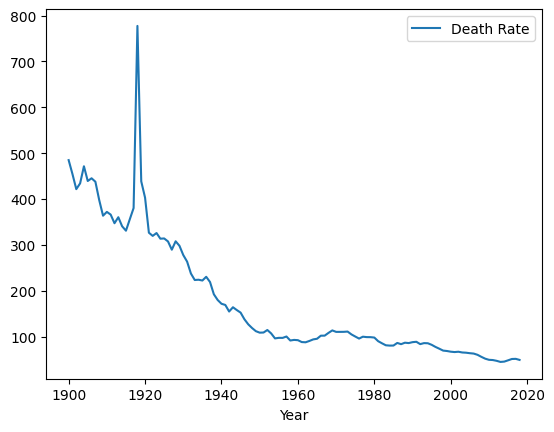

In [29]:
mortality_group.plot(x='Year', y='Death Rate')

In [30]:
mortality_group.query('`Death Rate` > 500')

,Year,Age Group,Death Rate
375,1918,15-19 Years,777.4


# fix outlier

In [33]:
# mortality_group = mortality_group.query('`Death Rate` <= 500')
mortality_group.loc[mortality_group['Death Rate'] > 500 , 'Death Rate'] = 450
mortality_group.loc[375]

Year                 1918
Age Group     15-19 Years
Death Rate          450.0
Name: 375, dtype: object

In [37]:
mortality_group.loc[mortality_group['Death Rate'] > 500, 'Death Rate'] \
    = mortality_group['Death Rate'].mean()

In [45]:
mortality_group.loc[mortality_group['Year'].isin([1917,1918, 1919,1920]), 'Death Rate'] \
    = np.nan
mortality_group = mortality_group.interpolate()

C:\Users\m.ali\AppData\Local\Temp\ipykernel_37004\2598178431.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  mortality_group = mortality_group.interpolate()


<Axes: xlabel='Year'>

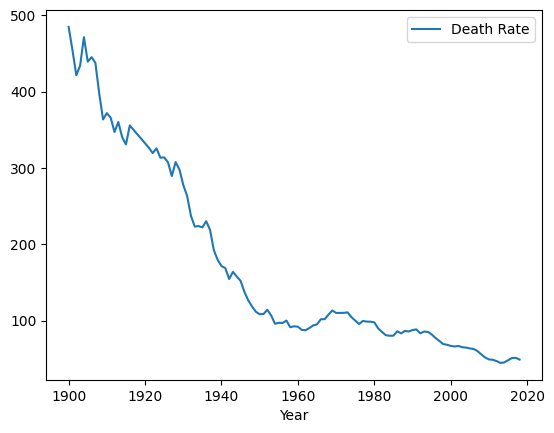

In [46]:
mortality_group.plot(x='Year', y='Death Rate')